In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/dataset/power.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float32)
# 정규화
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
print(data.shape)
print(len(data) * 0.8)    # 데이터 나누기 위해서

FileNotFoundError: /content/drive/MyDrive/Colab Notebooks/dataset/power.csv not found.

In [ ]:
# 데이터셋 만들기(주의 : 다음날 예측입니다)
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]                 # 라벨(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)

(17520, 5)
(17520,)


In [ ]:
# 데이터 셋 만들기
x_train = x_data[ : 14000 ,  : ]         # 학습 데이터
y_train = y_data[ : 14000]

x_test = x_data[14001 : ,  : ]          # 테스트 데이터
y_test = y_data[14001 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14000, 5)
(14000,)
(3519, 5)
(3519,)


In [ ]:
model = Sequential()
#  input layer(5) * hidden layer(128) /  초기화 / relu
model.add(Dense(128, input_dim = 5,  activation='relu'))
model.add(Dropout(0.5))     # Dropout : 30%

#  hidden layer(128) * hidden layer(128) /  초기화 / relu
model.add(Dense(128, activation='relu'))

#  hidden layer(128) * ouput layer(1) / linear
model.add(Dense(1, activation='linear'))   # 128 * 1(출력)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일 하기
model_checkpoint = ModelCheckpoint(filepath =  "./model.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

# 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(lr = 0.001), metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# 모델 학습
hist = model.fit(
                  x_train, y_train,                        # 입력 / 라벨
                  epochs = 50, batch_size = 10,            # 학습 회수 / 학습 10번 후 오차 감소
                  validation_data=(x_test, y_test),        # 검증 데이터
                  callbacks = [model_checkpoint, early_stopping] # 저장 및 모니터링
                 )

Epoch 1/50
1398/1400 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5211
Epoch 1: val_loss did not improve from inf
1400/1400 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.5209 - val_loss: nan - val_accuracy: 0.5638
Epoch 2/50
1392/1400 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5207
Epoch 2: val_loss did not improve from inf
1400/1400 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5209 - val_loss: nan - val_accuracy: 0.5638
Epoch 3/50
1392/1400 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5214
Epoch 3: val_loss did not improve from inf
1400/1400 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5209 - val_loss: nan - val_accuracy: 0.5638


In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# RMSE 오차 확안
rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test - predict)))
print("RMSE : ", rmse)

110/110 [==============================] - 0s 1ms/step
RMSE :  tf.Tensor(nan, shape=(), dtype=float32)


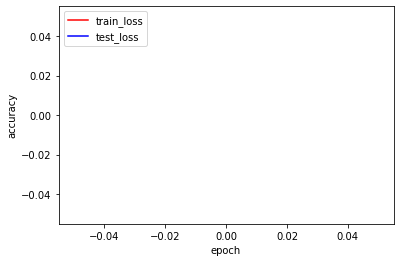

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'r', label = 'train_loss')
plt.plot(hist.history['val_loss'], 'b', label = 'test_loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

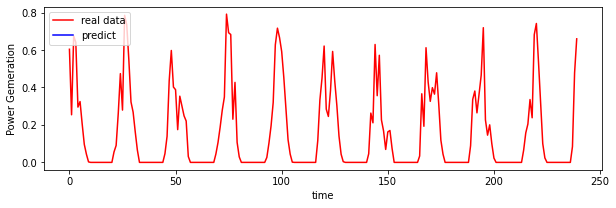

In [ ]:
    plt.figure(figsize=(10, 3))
    plt.plot(y_test[240 : 480], 'r', label = 'real data')   			# 테스트 데이터 실제값 출력
    plt.plot(predict[240 : 480], 'b', label = 'predict')   		# 예측값 출력
    plt.xlabel("time")
    plt.ylabel("Power Gemeration")
    plt.legend(loc='upper left')
    plt.show()